# SyriaTel Customer Churn Prediction

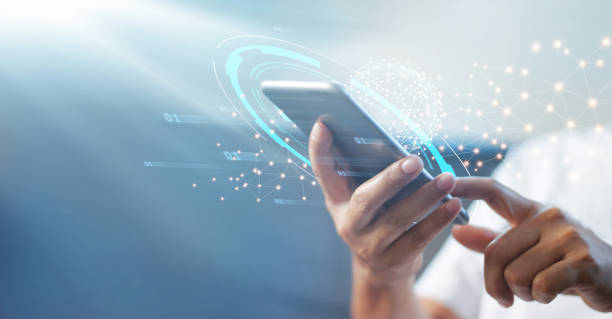

## Overview

For Telco companies it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.
The churn metric is expressed as the percentage of customers who cancel their contract or subscription within a specific period, typically a month. For example, if SyriaTel had 10 million customers at the beginning of January and 500,000 customers terminated their contracts by the end of January, the monthly churn rate for January would be 5%.
This project is geared towards predicting and reducing customer churn for SyriaTel by analyzing customer behavior and applying machine learning models to identify high-risk customers and implement retention strategies.


## 1. Business UnderStanding

Problem Statement
SyriaTel is a prominent telecommunications provider in Syria, offering a range of services including mobile and fixed-line voice communication, data services, and broadband internet. The company aims to expand its market share and enhance customer satisfaction while maintaining a strong and competitive position in the telecom industry.
SyriaTel is facing a high churn rate, with many customers discontinuing their services and switching to competitors. The company wants to address this issue by developing a customer churn prediction model. By analyzing the dataset, SyriaTel aims to gain insights into factors associated with churn, with the goal of reducing churn rate, increasing customer retention, and improving overall profitability.

Specific Objectives
1. Identify the factors that are most likely to lead to customer churn.

2. Develop a model that can accurately predict which customers are at risk of churning.

3. Take proactive steps to retain customers who are at risk of churning.


## Success Metrics
- Developing a robust churn prediction model with high recall score of 0.8.

- Identifying the key features and factors that significantly contribute to customer churn.

- Providing actionable insights and recommendations to the telecom company for reducing churn and improving customer retention.
- Demonstrating the value of churn prediction models in enabling proactive retention strategies and reducing revenue  losses due to customer churn.

# Import libraries and packages

In [78]:

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px
import category_encoders as ce
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('./data/bigml_59.csv')
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# **2. Exploratory data analysis** 

In [4]:
shape = df.shape
print(f"The DataFrame has {shape[0]} rows and {shape[1]} columns.")

The DataFrame has 3333 rows and 21 columns.


In [5]:
col_names = df.columns

col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Column Names and Descriptions:

Based on the column descriptions, below are further comments on some of them based on relevance for modelling or predicting house prices.
* **Id and Date:** These columns can be useful for identifying records and time-based analysis. However, they may not be directly useful for modeling.
* **Price:** This is the target variable we aim to predict.
* **Bedrooms and Bathrooms:** These are essential features representing the size and functionality of the house.
* **Square Footage:** The living area (sqft_living) and lot size (sqft_lot) are crucial features for predicting house prices.

In [6]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object or bool. Numerical variables have data type float64 or int64.


First of all, I will find categorical variables.

In [7]:
# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object', 'bool']).columns

# Print categorical variables
print("Categorical variables:")
print(categorical_vars)

Categorical variables:
Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')


In [8]:
# view the categorical variables

df[categorical_vars].head()

,state,phone number,international plan,voice mail plan,churn
0,KS,382-4657,no,yes,False
1,OH,371-7191,no,yes,False
2,NJ,358-1921,no,no,False
3,OH,375-9999,yes,no,False
4,OK,330-6626,yes,no,False


### Summary of categorical variables


- There are 5 categorical variables. These are given by `state`, `phone number`, `international plan`, `voive mail plan`,  and  `churn`.


- Churn is a binary categorical variables and is the target variable.

## Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [9]:
# check missing values in categorical variables

df[categorical_vars].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
churn                 0
dtype: int64

We can see that there no missing values in the categorical variables dataset.

### Frequency counts of categorical variables

Now, I will check the frequency counts of categorical variables.

In [10]:
# view frequency of categorical variables

for var in categorical_vars: 
    
    print(df[var].value_counts())

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
336-3819    1
402-2482    1
368-3287    1
419-9509    1
370-2892    1
           ..
327-3587    1
408-8650    1
400-6454    1
385-1423    1
370-3271    1
Name: phone number, Length: 3333, dtype: int64
no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64
False    2850
True      483
Name: churn, dtype: int64


In [11]:
# View frequency distribution of categorical variables
for var in categorical_vars:
    # Calculate and print the frequency distribution as proportions
    freq_distribution = df[var].value_counts(normalize=True)
    print(f"Frequency distribution for {var}:")
    print(freq_distribution)
    print()

Frequency distribution for state:
WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OH    0.023402
WI    0.023402
OR    0.023402
VA    0.023102
WY    0.023102
CT    0.022202
ID    0.021902
VT    0.021902
MI    0.021902
UT    0.021602
TX    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
MA    0.019502
MS    0.019502
RI    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
ME    0.018602
NM    0.018602
ND    0.018602
OK    0.018302
DE    0.018302
NE    0.018302
SD    0.018002
SC    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
DC    0.016202
GA    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

Frequency distribution for phone number:
336-3819    0.0003
402-2482    0.0003
368-3287    0.0003
419-9509    0.0003
370-2892    0.0003
             ...  
327-3587    0.000

### Number of labels: cardinality

The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [12]:
for var in categorical_vars:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels
churn  contains  2  labels


We can see that there is a `phone number` variable which needs to be preprocessed. I will do preprocessing in the following section.


All the other variables contain relatively smaller number of labels.

### Feature Engineering of phonenumber Variable

In [13]:
# Extracting phone codes (assuming phone numbers are in a specific format)
df['PhoneCode'] = df['phone number'].str[:3]
df['PhoneCode']

0       382
1       371
2       358
3       375
4       330
       ... 
3328    414
3329    370
3330    328
3331    364
3332    400
Name: PhoneCode, Length: 3333, dtype: object

In [14]:
# Verify the first few rows
print(df[['phone number', 'PhoneCode']].head())

  phone number PhoneCode
0     382-4657       382
1     371-7191       371
2     358-1921       358
3     375-9999       375
4     330-6626       330


In [15]:
# Check for any unusual values in 'PhoneCode'
print(df['PhoneCode'].value_counts())

405    53
408    48
406    47
352    47
333    46
       ..
342    24
421    24
412    23
422    19
327    19
Name: PhoneCode, Length: 96, dtype: int64


In [16]:
# Check for missing values in 'PhoneCode'
print(df['PhoneCode'].isnull().sum())

0


Phone_Code visualization

count     3333
unique      96
top        405
freq        53
Name: PhoneCode, dtype: object


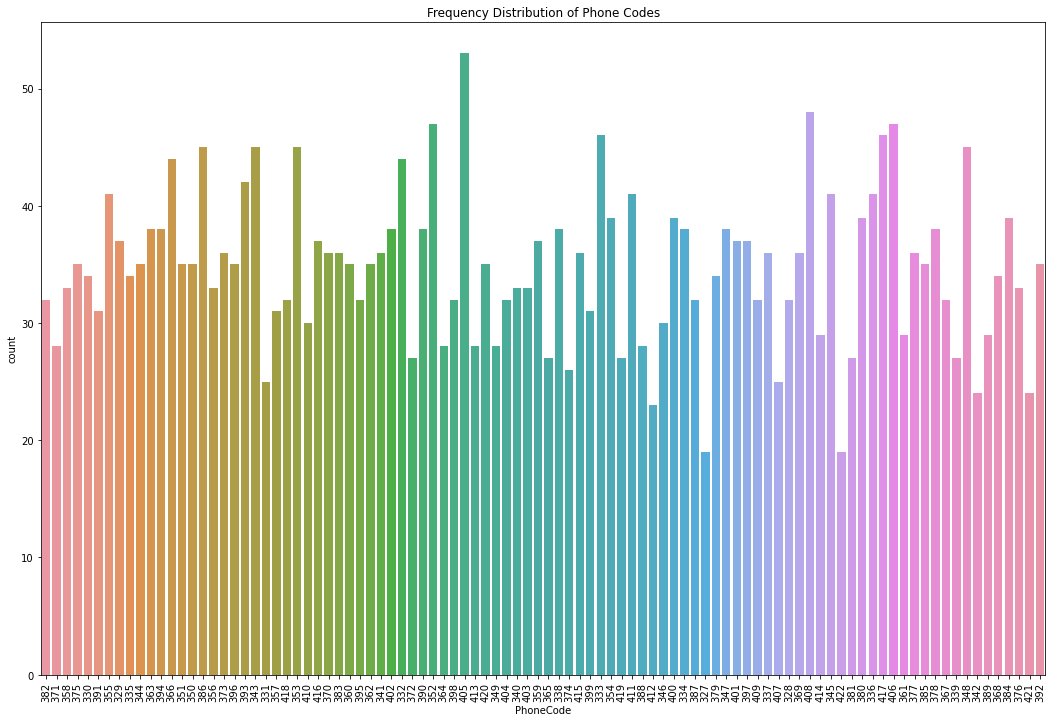

In [17]:
# Summary statistics of the 'PhoneCode' column
print(df['PhoneCode'].describe())

# Plot the frequency distribution of phone codes
plt.figure(figsize=(18, 12))
sns.countplot(x='PhoneCode', data=df)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Phone Codes')
plt.show()

In [18]:
df['phone number'].dtypes

dtype('O')

We can see that the data type of `phone number` variable is object. I will parse the "PhoneCode" as object.

In [19]:
# Ensure 'PhoneCode' is of object type
df['PhoneCode'] = df['PhoneCode'].astype('object')

In [20]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We can see that there is an additional columns created from `PhoneCode` variable. Now, I will drop the original `phone number` variable from the dataset.

In [21]:
# drop the original 'phone number' variable

df.drop('phone number', axis=1, inplace = True)

In [22]:
# preview the dataset again

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,PhoneCode
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,382
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,371
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,358
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,375
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,330


Now, we can see that the `phone number` variable has been removed from the dataset and 'PhoneCode' has been added

### Explore Categorical Variables


Now, I will explore the categorical variables one by one.

In [23]:
# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object', 'bool']).columns

# Print categorical variables
print('There are {} categorical variables\n'.format(len(categorical_vars)))

print('The categorical variables are :', categorical_vars)

There are 5 categorical variables

The categorical variables are : Index(['state', 'international plan', 'voice mail plan', 'churn', 'PhoneCode'], dtype='object')


We can see that there are 5 categorical variables in the dataset. The `phone number` variable has been removed. First, I will check missing values in categorical variables.

In [24]:
# check for missing values in categorical variables 

df[categorical_vars].isnull().sum()

state                 0
international plan    0
voice mail plan       0
churn                 0
PhoneCode             0
dtype: int64

### Explore `state` variable

In [25]:
# print number of labels in state variable

print('state contains', len(df["state"].unique()), 'labels')

state contains 51 labels


In [26]:
# check labels in state variable

df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [27]:
# check frequency distribution of values in state variable

df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [28]:
# let's do One Hot Encoding of state variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df["state"], drop_first=True).head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore `international plan` variable

In [29]:
# print number of labels in international plan variable

print('international plan contains', len(df['international plan'].unique()), 'labels')

international plan contains 2 labels


In [30]:
# check labels in international plan variable

df['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
# check frequency distribution of values in international plan variable

df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [32]:
# let's do One Hot Encoding of international plan variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df['international plan'], drop_first=True, dummy_na=True,dtype='int').head()

,yes,NaN
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [33]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['international plan'], drop_first=True, dummy_na=True).sum(axis=0)

yes    323
NaN      0
dtype: int64

There are 323 yes values and no missing values in the `international plan` variable. The rest are no values

### Explore `voice mail plan` variable

In [34]:
# print number of labels in voice mail plan variable

print('voice mail plan contains', len(df['voice mail plan'].unique()), 'labels')

voice mail plan contains 2 labels


In [35]:
# check labels in voice mail plan variable

df['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [36]:
# check frequency distribution of values in voice mail plan variable

df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [37]:
# let's do One Hot Encoding of voice mail plan variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df['voice mail plan'], drop_first=True, dummy_na=True,dtype='int').head()

,yes,NaN
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['voice mail plan'], drop_first=True, dummy_na=True).sum(axis=0)

yes    922
NaN      0
dtype: int64

There are 922 yes values and no missing values in the `voice mail plan` variable. The rest are no values

### Explore `PhoneCode` variable

In [39]:
# print number of labels in PhoneCode variable

print('PhoneCode contains', len(df['PhoneCode'].unique()), 'labels')

PhoneCode contains 96 labels


In [40]:
# check labels in PhoneCode variable

df['PhoneCode'].unique()

array(['382', '371', '358', '375', '330', '391', '355', '329', '335',
       '344', '363', '394', '366', '351', '350', '386', '356', '373',
       '396', '393', '343', '331', '357', '418', '353', '410', '416',
       '370', '383', '360', '395', '362', '341', '402', '332', '372',
       '390', '352', '364', '398', '405', '413', '420', '349', '404',
       '340', '403', '359', '365', '338', '374', '415', '399', '333',
       '354', '419', '411', '388', '412', '346', '400', '334', '387',
       '327', '379', '347', '401', '397', '409', '337', '407', '328',
       '369', '408', '414', '345', '422', '381', '380', '336', '417',
       '406', '361', '377', '385', '378', '367', '339', '348', '342',
       '389', '368', '384', '376', '421', '392'], dtype=object)

In [41]:
# check frequency distribution of values in PhoneCode variable

df['PhoneCode'].value_counts()

405    53
408    48
406    47
352    47
333    46
       ..
342    24
421    24
412    23
422    19
327    19
Name: PhoneCode, Length: 96, dtype: int64

In [42]:
# let's do One Hot Encoding of PhoneCode variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df['PhoneCode'], drop_first=True, dummy_na=True,dtype='int').head()

,328,329,330,331,332,333,334,335,336,337,...,414,415,416,417,418,419,420,421,422,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['PhoneCode'], drop_first=True, dummy_na=True).sum(axis=0)

328    32
329    37
330    34
331    25
332    44
       ..
419    27
420    35
421    24
422    19
NaN     0
Length: 96, dtype: int64

There are no missing values

### Explore `Churn` variable

In [44]:
# print number of labels in Churn variable

print('Churn contains', len(df['churn'].unique()), 'labels')

Churn contains 2 labels


In [45]:
# check labels in churn variable

df['churn'].unique()

array([False,  True])

In [46]:
# check frequency distribution of values in churn variable

df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [47]:
# let's do One Hot Encoding of churn variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df['churn'], drop_first=True, dummy_na=True,dtype='int').head()

,True,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [48]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df['churn'], drop_first=True, dummy_na=True).sum(axis=0)

True    483
NaN       0
dtype: int64

There are 483 True values and no missing values in the `churn` variable. The rest are False values

### Explore Numerical Variables

In [49]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype not in ['object', 'bool']]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [50]:
# view the numerical variables

df[numerical].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### Summary of numerical variables

- There are 16 numerical variables. 

- These are given by 'account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge' and 'customer service calls'

- All of the numerical variables are of continuous type.

## Explore problems within numerical variables

Now, I will explore the numerical variables.

### Missing values in numerical variables

In [51]:
# check missing values in numerical variables

df[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

We can see that all the 16 numerical variables do not contain missing values.

### Outliers in numerical variables

In [52]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       account length  area code  number vmail messages  total day minutes  \
count          3333.0     3333.0                 3333.0             3333.0   
mean            101.0      437.0                    8.0              180.0   
std              40.0       42.0                   14.0               54.0   
min               1.0      408.0                    0.0                0.0   
25%              74.0      408.0                    0.0              144.0   
50%             101.0      415.0                    0.0              179.0   
75%             127.0      510.0                   20.0              216.0   
max             243.0      510.0                   51.0              351.0   

       total day calls  total day charge  total eve minutes  total eve calls  \
count           3333.0            3333.0             3333.0           3333.0   
mean             100.0              31.0              201.0            100.0   
std               20.0               9.0               51

On closer inspection, we can see that the `area code`, `number of vmail messages`, `total intl calls` and `customer service calls` columns may contain outliers.


I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'customer service calls')

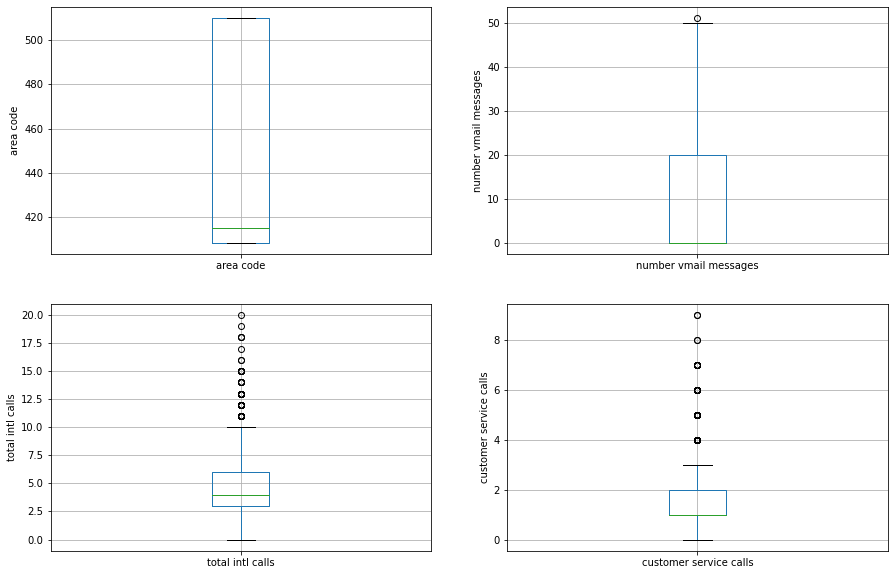

In [53]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='area code')
fig.set_title('')
fig.set_ylabel('area code')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='number vmail messages')
fig.set_title('')
fig.set_ylabel('number vmail messages')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='total intl calls')
fig.set_title('')
fig.set_ylabel('total intl calls')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='customer service calls')
fig.set_title('')
fig.set_ylabel('customer service calls')

The above boxplots confirm that there are outliers in these variables except area code.

### Check the distribution of variables

Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do `Extreme Value Analysis` otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'No of customer service calls')

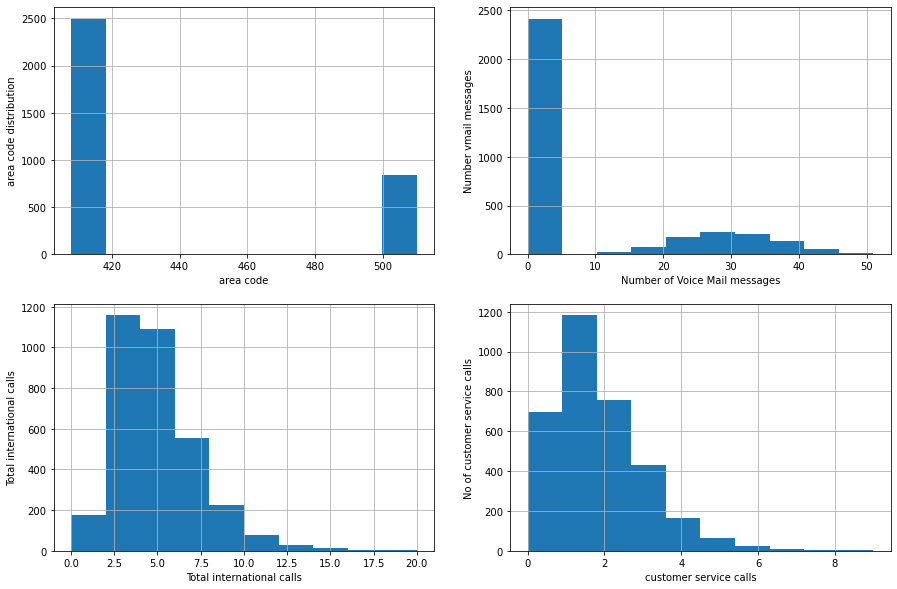

In [54]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df["area code"].hist(bins=10)
fig.set_xlabel('area code')
fig.set_ylabel('area code distribution')


plt.subplot(2, 2, 2)
fig = df["number vmail messages"].hist(bins=10)
fig.set_xlabel('Number of Voice Mail messages')
fig.set_ylabel('Number vmail messages')


plt.subplot(2, 2, 3)
fig = df["total intl calls"].hist(bins=10)
fig.set_xlabel('Total international calls')
fig.set_ylabel('Total international calls')


plt.subplot(2, 2, 4)
fig = df["customer service calls"].hist(bins=10)
fig.set_xlabel('customer service calls')
fig.set_ylabel('No of customer service calls')

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [55]:
# find outliers for area code variable

IQR = df["area code"].quantile(0.75) - df['area code'].quantile(0.25)
Lower_fence = df["area code"].quantile(0.25) - (IQR * 3)
Upper_fence = df["area code"].quantile(0.75) + (IQR * 3)
print('area code outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


area code outliers are values < 102.0 or > 816.0


For `area code`, the minimum and maximum values are 408 and 510 So, the outliers are values < 102.0 or > 816.0.

In [56]:
# find outliers for number of voice mail messages variable

IQR = df["number vmail messages"].quantile(0.75) - df['number vmail messages'].quantile(0.25)
Lower_fence = df["number vmail messages"].quantile(0.25) - (IQR * 3)
Upper_fence = df["number vmail messages"].quantile(0.75) + (IQR * 3)
print('Number of voice mail messages outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Number of voice mail messages outliers are values < -60.0 or > 80.0


For `voice mail messages`, the minimum and maximum values are 0 and 51 So, the outliers are values > 80.0.

In [57]:
# find outliers for number of total International calls variable

IQR = df["total intl calls"].quantile(0.75) - df['total intl calls'].quantile(0.25)
Lower_fence = df["total intl calls"].quantile(0.25) - (IQR * 3)
Upper_fence = df["total intl calls"].quantile(0.75) + (IQR * 3)
print('Number of total international calls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Number of total international calls outliers are values < -6.0 or > 15.0


For `total international calls`, the minimum and maximum values are 0 and 5 So, the outliers are values > 15.0.

In [58]:
# find outliers for number of customer service calls variable

IQR = df["customer service calls"].quantile(0.75) - df['customer service calls'].quantile(0.25)
Lower_fence = df["customer service calls"].quantile(0.25) - (IQR * 3)
Upper_fence = df["customer service calls"].quantile(0.75) + (IQR * 3)
print('Number of customer service calls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Number of customer service calls outliers are values < -2.0 or > 5.0


For `customer service calls`, the minimum and maximum values are 0 and 9 and the mean is 2, So the outliers are values > 5.0

# 3. Declare feature vector and target variable

In [59]:
X = df.drop(['churn'], axis=1)

y = df['churn']

# 4. Split data into separate training and test set 

In [60]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2666, 20), (667, 20))

# 5. Feature Engineering

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [62]:
# check data types in X_train

X_train.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
PhoneCode                  object
dtype: object

In [63]:
# display categorical variables

categorical_vars = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_vars

['state', 'international plan', 'voice mail plan', 'PhoneCode']

In [64]:
# display numerical variables

#numerical = [col for col in X_train.columns if X_train[col].dtypes != ['object', 'bool']]
numerical = X_train.select_dtypes(include=['number']).columns.tolist()
numerical

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

### Engineering missing values in numerical variables

In [67]:
# check missing values in numerical variables in X_train

X_test[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

As expected, there is no missing values in the x_test data itself

### Assumption

I assume that there is no data no missing x_test values. We therefore we dont need to impute the data to fill in for the missing values.

### Engineering missing values in categorical variables

In [66]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical_vars].isnull().mean()

state                 0.0
international plan    0.0
voice mail plan       0.0
PhoneCode             0.0
dtype: float64

Again we see there is no missing values in categorical data

As a final check, I will check for missing values in X_train and X_test.

In [68]:
# check missing values in X_train

X_train.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
PhoneCode                 0
dtype: int64

In [69]:
# check missing values in X_test

X_test.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
PhoneCode                 0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Engineering outliers in numerical variables

We have seen that the `area code`, `number vmail messages`, `total intl calls` and `customer service calls` columns contain outliers

In [70]:
X_train.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
PhoneCode                 0
dtype: int64

In [71]:
upper_thresholds = {
    'area code': 510,
    'number vmail messages': 51,
    'total intl calls': 5,
    'customer service calls': 9
}

for df3 in [X_train, X_test]:
    for column, top in upper_thresholds.items():
        df3[column] = df3[column].clip(upper=top)
        if column in df.columns:  # Check if the column exists in the DataFrame
            df[column] = df[column].clip(upper=top)

In [72]:
#X_train.area code.max(), X_test.area code.max()
max_values_X_train = X_train[upper_thresholds.keys()].max()
max_values_X_test = X_test[upper_thresholds.keys()].max()

print("Max values in X_train after clipping:\n", max_values_X_train)
print("Max values in X_test after clipping:\n", max_values_X_test)

Max values in X_train after clipping:
 area code                 510
number vmail messages      51
total intl calls            5
customer service calls      9
dtype: int64
Max values in X_test after clipping:
 area code                 510
number vmail messages      50
total intl calls            5
customer service calls      8
dtype: int64


In [73]:
X_train[numerical].describe() 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.351463,437.351838,7.998500,179.960315,100.424231,30.593792,201.581808,100.087022,17.134659,201.218492,100.057389,9.054906,10.240548,3.762566,2.765439,1.554389
std,39.902158,42.488511,13.572182,54.233805,20.116856,9.219742,51.032044,20.031025,4.337756,50.615479,19.814583,2.277747,2.813472,1.284444,0.759618,1.317883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,144.650000,87.000000,24.590000,166.925000,87.000000,14.192500,167.100000,86.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.400000,100.000000,30.500000,202.450000,100.000000,17.205000,201.200000,100.000000,9.055000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,216.000000,114.000000,36.720000,236.200000,114.000000,20.080000,235.675000,114.000000,10.607500,12.100000,5.000000,3.270000,2.000000
max,232.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,5.000000,5.400000,9.000000


We can now see that the outliers in `Area code`, `number of vmail messages`, `total intl calls` and `customer service calls` columns are capped.

In [74]:
X_train.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
PhoneCode                 0
dtype: int64

### Encode categorical variables

In [75]:
categorical_vars

['state', 'international plan', 'voice mail plan', 'PhoneCode']

In [76]:
X_train[categorical_vars].head()

,state,international plan,voice mail plan,PhoneCode
1460,MT,no,no,361
2000,PA,no,no,334
666,OR,no,no,368
2962,SD,no,no,393
2773,NJ,no,yes,373


In [79]:
# Initialize BinaryEncoder with a list of columns
binary_encoder = ce.BinaryEncoder(cols=['international plan', 'voice mail plan'])

# Fit and transform the training data
X_train_encoded = binary_encoder.fit_transform(X_train)

# Transform the test data
X_test_encoded = binary_encoder.transform(X_test)

In [80]:
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,PhoneCode
1460,MT,80,415,no,no,0,198.1,160,33.68,156.7,87,13.32,182.1,76,8.19,9.3,3,2.51,3,361
2000,PA,28,415,no,no,0,168.2,87,28.59,161.7,92,13.74,192.4,112,8.66,10.1,3,2.73,3,334
666,OR,120,415,no,no,0,252.0,120,42.84,150.2,106,12.77,151.8,96,6.83,9.6,1,2.59,2,368
2962,SD,105,415,no,no,0,251.6,88,42.77,175.1,103,14.88,184.4,112,8.30,5.4,5,1.46,1,393
2773,NJ,134,510,no,yes,34,247.2,105,42.02,225.5,133,19.17,186.3,76,8.38,6.1,5,1.65,2,373


In [81]:
X_train.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
PhoneCode                 0
dtype: int64

Now, I will create the `X_train` training set.

In [82]:
# using ohe Recommended 

ohe = ce.OneHotEncoder(cols=["state","international plan","voice mail plan","PhoneCode"],handle_missing="value",handle_unknown="ignore")

ohe.fit(X_train)

X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

X_train.head()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,PhoneCode_87,PhoneCode_88,PhoneCode_89,PhoneCode_90,PhoneCode_91,PhoneCode_92,PhoneCode_93,PhoneCode_94,PhoneCode_95,PhoneCode_96
1460,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
666,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2962,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2773,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Similarly, I will create the `X_test` testing set.

In [84]:
X_test.head()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,PhoneCode_87,PhoneCode_88,PhoneCode_89,PhoneCode_90,PhoneCode_91,PhoneCode_92,PhoneCode_93,PhoneCode_94,PhoneCode_95,PhoneCode_96
405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

# **6. Feature Scaling**

In [85]:
X_train.describe()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,PhoneCode_87,PhoneCode_88,PhoneCode_89,PhoneCode_90,PhoneCode_91,PhoneCode_92,PhoneCode_93,PhoneCode_94,PhoneCode_95,PhoneCode_96
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,...,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,0.022506,0.013878,0.023256,0.018005,0.019130,0.020255,0.030758,0.016879,0.018755,0.020630,...,0.007502,0.010128,0.012003,0.013128,0.008627,0.011253,0.012003,0.005626,0.010503,0.010503
std,0.148349,0.117009,0.150743,0.132992,0.137007,0.140898,0.172693,0.128843,0.135683,0.142169,...,0.086304,0.100144,0.108919,0.113845,0.092498,0.105501,0.108919,0.074812,0.101962,0.101962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [88]:
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

In [89]:
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
    )

In [90]:
X_train.describe()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,PhoneCode_87,PhoneCode_88,PhoneCode_89,PhoneCode_90,PhoneCode_91,PhoneCode_92,PhoneCode_93,PhoneCode_94,PhoneCode_95,PhoneCode_96
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,...,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,0.022506,0.013878,0.023256,0.018005,0.019130,0.020255,0.030758,0.016879,0.018755,0.020630,...,0.007502,0.010128,0.012003,0.013128,0.008627,0.011253,0.012003,0.005626,0.010503,0.010503
std,0.148349,0.117009,0.150743,0.132992,0.137007,0.140898,0.172693,0.128843,0.135683,0.142169,...,0.086304,0.100144,0.108919,0.113845,0.092498,0.105501,0.108919,0.074812,0.101962,0.101962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

# **7. Model training** 

In [91]:
X_train.isnull().sum()

state_1         0
state_2         0
state_3         0
state_4         0
state_5         0
               ..
PhoneCode_92    0
PhoneCode_93    0
PhoneCode_94    0
PhoneCode_95    0
PhoneCode_96    0
Length: 167, dtype: int64

In [92]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# **8. Predict results** 

In [93]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

### predict_proba method

**predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

`0 is for not churning` and `1 is for churning.`

In [94]:
# probability of getting output as 0 - no churn

logreg.predict_proba(X_test)[:,0]

array([0.69492933, 0.96464203, 0.79689587, 0.91123407, 0.1302019 ,
       0.31063709, 0.54002009, 0.90803103, 0.73837134, 0.6051113 ,
       0.97711015, 0.9368615 , 0.79001304, 0.9896553 , 0.79528087,
       0.74516469, 0.90179659, 0.8672895 , 0.9442934 , 0.97617466,
       0.9672907 , 0.97100048, 0.94979693, 0.98502318, 0.93290361,
       0.88821015, 0.90834174, 0.94028818, 0.7438388 , 0.89675339,
       0.92577367, 0.98832052, 0.6986641 , 0.98239899, 0.97209945,
       0.96203685, 0.17726411, 0.95716147, 0.97919816, 0.70039104,
       0.95141513, 0.88593511, 0.74652507, 0.65890416, 0.99056151,
       0.98586719, 0.94368955, 0.93932819, 0.91544105, 0.95136934,
       0.99335282, 0.87038429, 0.8948471 , 0.91035029, 0.9925271 ,
       0.9501804 , 0.96752679, 0.96847162, 0.92182769, 0.32479367,
       0.91383627, 0.94656881, 0.99288901, 0.93549649, 0.89074462,
       0.77114067, 0.88333082, 0.85463879, 0.96046527, 0.93685109,
       0.99448365, 0.98336429, 0.9720325 , 0.51676879, 0.72950

In [95]:
# probability of getting output as 1 - churn

logreg.predict_proba(X_test)[:,1]

array([3.05070673e-01, 3.53579652e-02, 2.03104134e-01, 8.87659281e-02,
       8.69798101e-01, 6.89362915e-01, 4.59979910e-01, 9.19689723e-02,
       2.61628660e-01, 3.94888704e-01, 2.28898477e-02, 6.31385027e-02,
       2.09986961e-01, 1.03446958e-02, 2.04719130e-01, 2.54835313e-01,
       9.82034103e-02, 1.32710496e-01, 5.57066029e-02, 2.38253438e-02,
       3.27093023e-02, 2.89995241e-02, 5.02030731e-02, 1.49768177e-02,
       6.70963916e-02, 1.11789849e-01, 9.16582554e-02, 5.97118182e-02,
       2.56161196e-01, 1.03246610e-01, 7.42263257e-02, 1.16794819e-02,
       3.01335895e-01, 1.76010115e-02, 2.79005501e-02, 3.79631503e-02,
       8.22735894e-01, 4.28385280e-02, 2.08018403e-02, 2.99608960e-01,
       4.85848735e-02, 1.14064890e-01, 2.53474930e-01, 3.41095835e-01,
       9.43848567e-03, 1.41328079e-02, 5.63104512e-02, 6.06718075e-02,
       8.45589485e-02, 4.86306583e-02, 6.64718419e-03, 1.29615713e-01,
       1.05152904e-01, 8.96497104e-02, 7.47289811e-03, 4.98195962e-02,
      

# **9. Check accuracy score**

In [96]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8696


Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [97]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([False, False, False, ...,  True, False,  True])

In [98]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8811


### Check for overfitting and underfitting

In [99]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8811
Test set score: 0.8696


The training-set accuracy score is 0.8811 while the test-set accuracy to be 0.8696. These two values are quite comparable. So, there is no question of overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately more than 85% accuracy on both the training and the test set. The model performance on both the training and test set are very comparable. It is likely the case of underfitting. 

I will increase C and fit a more flexible model.

In [100]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [101]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8837
Test set score: 0.8636


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [102]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [103]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8518
Test set score: 0.8681


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relative to the default parameters.

### Compare model accuracy with null accuracy


So, the model accuracy is 0.8696. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [104]:
# check class distribution in test set

y_test.value_counts()

False    579
True      88
Name: churn, dtype: int64

We can see that the occurences of most frequent class is 579. So, we can calculate null accuracy by dividing 579 by total number of occurences.

In [105]:
# check null accuracy score

null_accuracy = (579/(579+88))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8681


We can see that our model accuracy score is 0.8696 but null accuracy score is 0.8681. So, we can conclude that our Logistic Regression model needs to be improved for it to do a better job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is good. Our model can be investigated further and further iteration done to improve its performance in terms of predicting the class labels.


It does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.